In [1]:
import dlc_bci as bci
from utility import * 

## Get Data
Fetches the data from the server and saves it to a folder at the root 

In [2]:
train_input, train_target, test_input, test_target = import100HzData()
train_input_1000, train_target_1000, test_input_1000, test_target_1000 = import1000HzData()

<class 'torch.FloatTensor'> torch.Size([316, 28, 50])
<class 'torch.LongTensor'> torch.Size([316])
<class 'torch.FloatTensor'> torch.Size([100, 28, 50])
<class 'torch.LongTensor'> torch.Size([100])
<class 'torch.FloatTensor'> torch.Size([316, 28, 500])
<class 'torch.LongTensor'> torch.Size([316])
<class 'torch.FloatTensor'> torch.Size([100, 28, 500])
<class 'torch.LongTensor'> torch.Size([100])


In [3]:
print(train_input.shape) 
print(train_target.shape) 
print(test_input.shape) 
print(test_target.shape) 

torch.Size([316, 28, 50])
torch.Size([316])
torch.Size([100, 28, 50])
torch.Size([100])


## Visualize the data

28


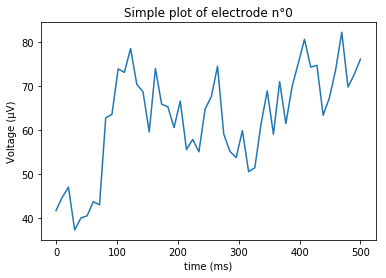

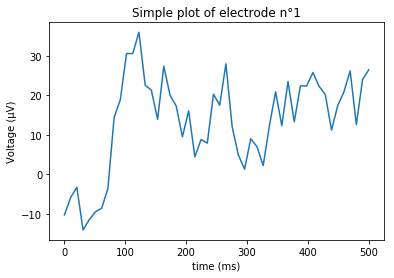

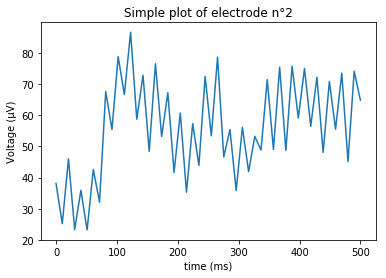

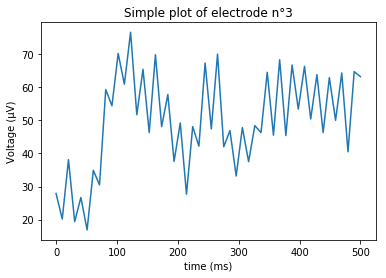

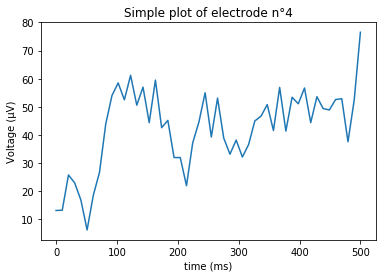

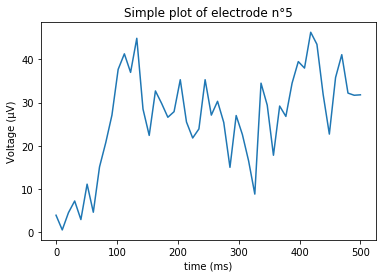

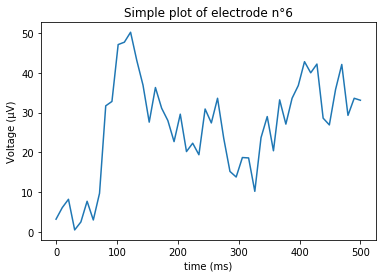

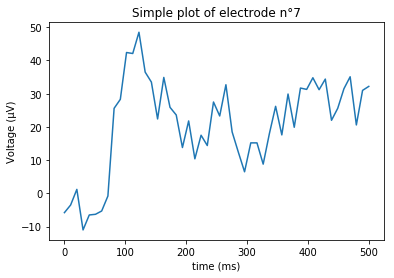

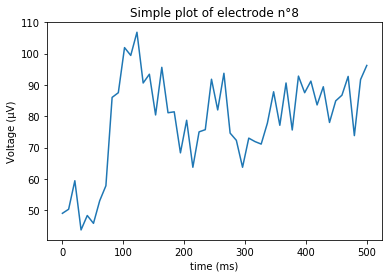

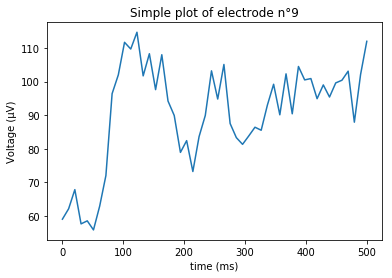

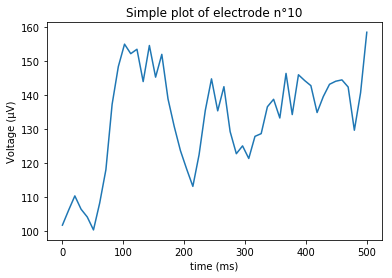

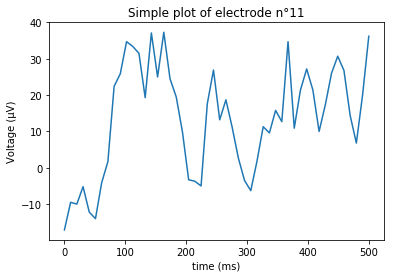

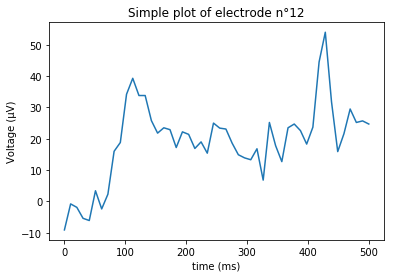

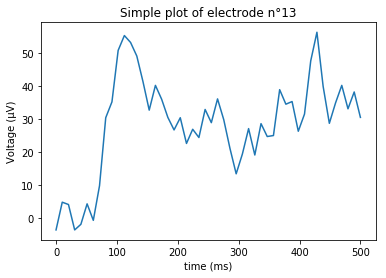

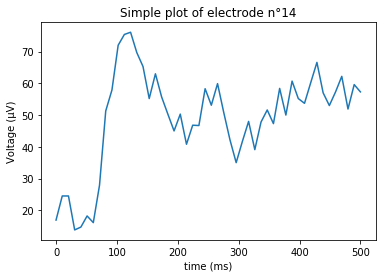

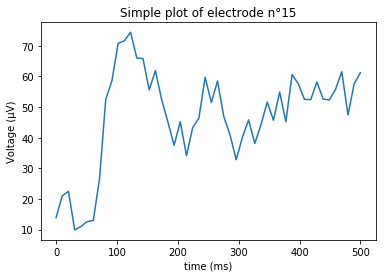

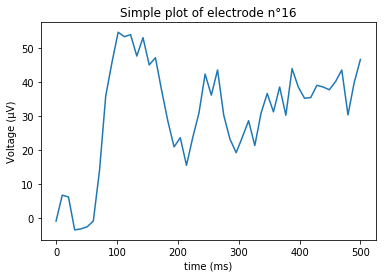

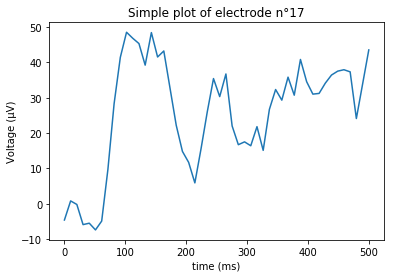

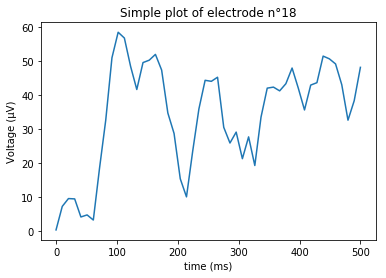

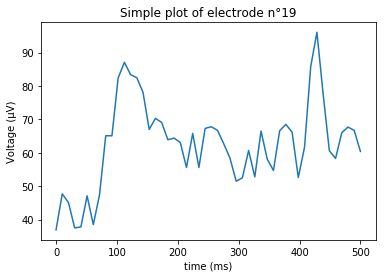

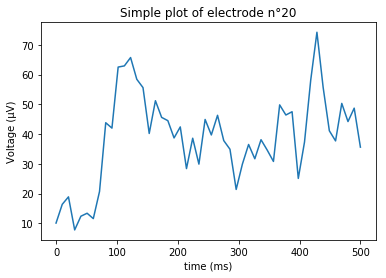

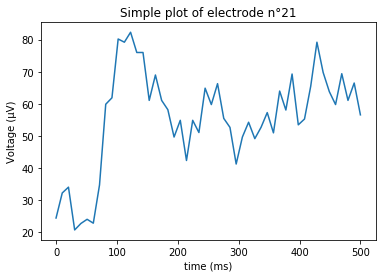

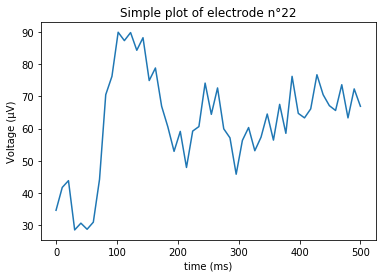

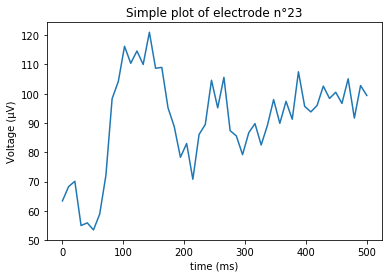

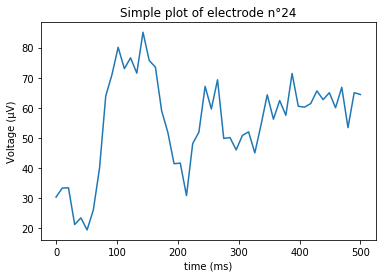

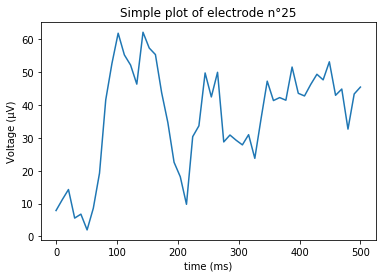

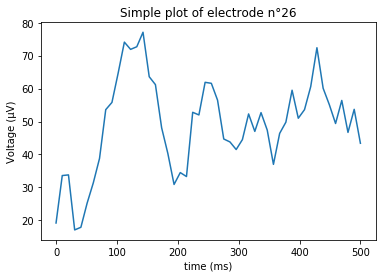

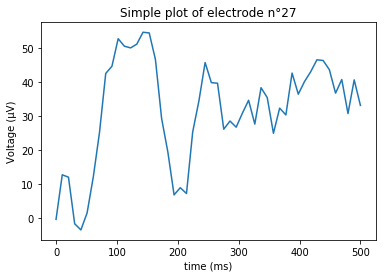

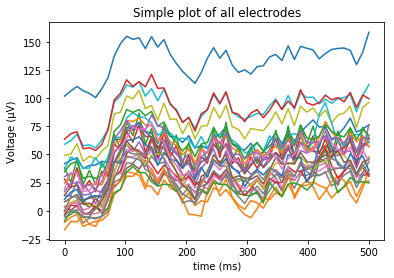

In [4]:
import matplotlib.pyplot as plt
import numpy as np 

inputlen = np.array(train_input[0, :, 0])
print (inputlen.size)

for i in range (0,inputlen.size) :
    time = np.linspace(0, 500, 50)
    data = train_input[0, i, :] #observing the samples n°1 for all time steps and all the electodes 
    data = np.array(data)
    plt.plot(time, data)
    plt.title('Simple plot of electrode n°' + str(i)) 
    plt.xlabel('time (ms)')
    plt.ylabel('Voltage (µV)')
    plt.show() #enables to show all electrodes separately 
    
for i in range (0,inputlen.size) :
    time = np.linspace(0, 500, 50)
    data = train_input[0, i, :]
    data = np.array(data)
    plt.plot(time, data)
    plt.xlabel('time (ms)')
    plt.ylabel('Voltage (µV)')
    plt.title('Simple plot of all electrodes') 

## Noise Removal

Buterworth filter, Moving average (low pass filter)

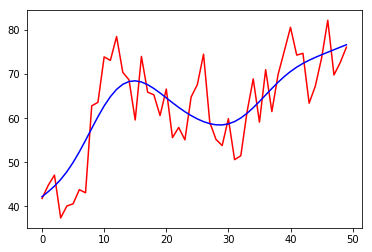

In [5]:
import scipy.signal as signal

#Ref. https://stackoverflow.com/questions/35588782/how-to-average-a-signal-to-remove-noise-with-python

# First, design the Buterworth filter, Moving average (low pass filter) 
N  = 3    # Filter order
Wn = 0.1 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')
train_inputA = np.array(train_input[0, 0, :])
smooth_data = signal.filtfilt(B,A, train_inputA)
plt.plot(train_inputA,'r-')
plt.plot(smooth_data,'b-')
plt.show()

Fourier Analysis - Example plot
NOTE: Importance of normalization to keep the magnitude 

In [6]:
import scipy

xs=np.arange(1,100,.01) #generate Xs (0.00,0.01,0.02,0.03,...,100.0)
signal = sin1=np.sin(xs*.3) #(A)
sin1=np.sin(xs) # (B) sin1
sin2=np.sin(xs*2.33)*.333 # (B) sin2
sin3=np.sin(xs*2.77)*.777 # (B) sin3
noise=sin1+sin2+sin3 # (C)
static = (np.random.random_sample((len(xs)))-.5)*.2 # (D)
sigstat=static+signal # (E)
rawsignal=sigstat+noise # (F)
fft=scipy.fft(rawsignal) # (G) and (H)
bp=fft[:]
for i in range(len(bp)): # (H-red)
    if i>=10:
        bp[i]=0
ibp=scipy.ifft(bp) # (I), (J), (K) and (L)

/Users/davidcleres/anaconda/envs/DeepLearning/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


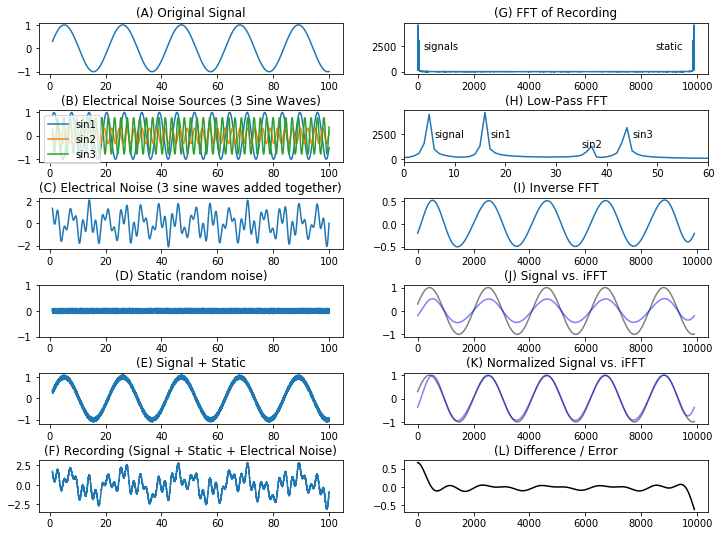

In [7]:
h,w=6,2
plt.figure(figsize=(12,9))
plt.subplots_adjust(hspace=.7)

plt.subplot(h,w,1);
plt.title("(A) Original Signal")
plt.plot(xs,signal)

plt.subplot(h,w,3);
plt.title("(B) Electrical Noise Sources (3 Sine Waves)")
plt.plot(xs,sin1,label="sin1")
plt.plot(xs,sin2,label="sin2")
plt.plot(xs,sin3,label="sin3")
plt.legend()

plt.subplot(h,w,5);
plt.title("(C) Electrical Noise (3 sine waves added together)")
plt.plot(xs,noise)

plt.subplot(h,w,7);
plt.title("(D) Static (random noise)")
plt.plot(xs,static)
plt.axis([None,None,-1,1])

plt.subplot(h,w,9);
plt.title("(E) Signal + Static")
plt.plot(xs,sigstat)

plt.subplot(h,w,11);
plt.title("(F) Recording (Signal + Static + Electrical Noise)")
plt.plot(xs,rawsignal)

plt.subplot(h,w,2);
plt.title("(G) FFT of Recording")
fft=scipy.fft(rawsignal)
plt.plot(abs(fft))
plt.text(200,3000,"signals",verticalalignment='top')
plt.text(9500,3000,"static",verticalalignment='top',
        horizontalalignment='right')

plt.subplot(h,w,4);
plt.title("(H) Low-Pass FFT")
plt.plot(abs(fft))
plt.text(17,3000,"sin1",verticalalignment='top',horizontalalignment='left')
plt.text(37,2000,"sin2",verticalalignment='top',horizontalalignment='center')
plt.text(45,3000,"sin3",verticalalignment='top',horizontalalignment='left')
plt.text(6,3000,"signal",verticalalignment='top',horizontalalignment='left')
plt.axis([0,60,None,None])

plt.subplot(h,w,6);
plt.title("(I) Inverse FFT")
plt.plot(ibp)

plt.subplot(h,w,8);
plt.title("(J) Signal vs. iFFT")
plt.plot(signal,'k',label="signal",alpha=.5)
plt.plot(ibp,'b',label="ifft",alpha=.5)

plt.subplot(h,w,10);
plt.title("(K) Normalized Signal vs. iFFT")
plt.plot(signal/max(signal),'k',label="signal",alpha=.5)
plt.plot(ibp/max(ibp),'b',label="ifft",alpha=.5)

plt.subplot(h,w,12);
plt.title("(L) Difference / Error")
plt.plot(signal/max(signal)-ibp/max(ibp),'k')

#Essayer de diviser par la longueur du signal. 

plt.savefig("SIG.png",dpi=200)
plt.show()

### Fourier Analysis - Our data 

/Users/davidcleres/anaconda/envs/DeepLearning/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


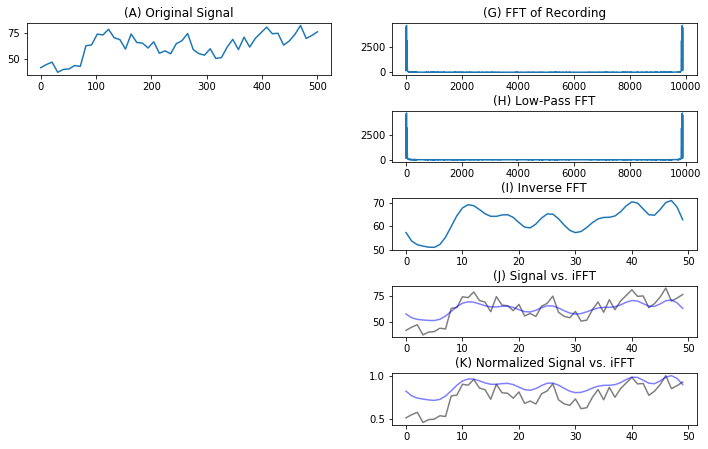

In [8]:
import scipy

xs=np.linspace(0,500,50) #generate Xs (0.00,0.01,0.02,0.03,...,100.0)
signal =  train_inputA = np.array(train_input[0, 0, :]) #(A)
fft=scipy.fft(signal) # (G) and (H)
bp=fft[:]
for i in range(len(bp)): # (H-red)
    if i>=10:
        bp[i]=0
ibp=scipy.ifft(bp) # (I), (J), (K) and (L)

### PLOT 

h,w=6,2
plt.figure(figsize=(12,9))
plt.subplots_adjust(hspace=.7)

plt.subplot(h,w,1);
plt.title("(A) Original Signal")
plt.plot(xs,signal)

plt.subplot(h,w,2);
plt.title("(G) FFT of Recording")
fft=scipy.fft(rawsignal)
plt.plot(abs(fft))

plt.subplot(h,w,4);
plt.title("(H) Low-Pass FFT")
plt.plot(abs(fft))

plt.subplot(h,w,6);
plt.title("(I) Inverse FFT")
plt.plot(ibp)

plt.subplot(h,w,8);
plt.title("(J) Signal vs. iFFT")
plt.plot(signal,'k',label="signal",alpha=.5)
plt.plot(ibp,'b',label="ifft",alpha=.5)

plt.subplot(h,w,10);
plt.title("(K) Normalized Signal vs. iFFT")
plt.plot(signal/max(signal),'k',label="signal",alpha=.5)
plt.plot(ibp/max(ibp),'b',label="ifft",alpha=.5)

plt.savefig("SIG.png",dpi=200)
plt.show()

# Preprocessing

Noise removed; Trend Removed; Offset translated; Normalized 

### A "0" Labelled signal 

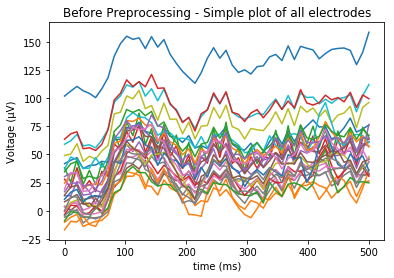

/Users/davidcleres/anaconda/envs/DeepLearning/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


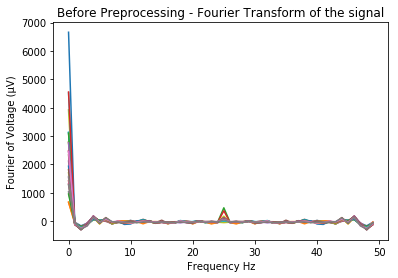

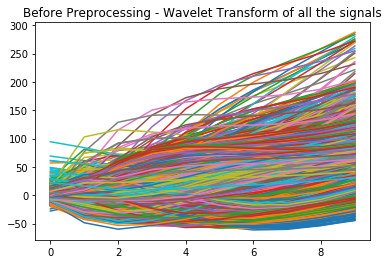

In [9]:
for i in range (0,inputlen.size) :
    time = np.linspace(0, 500, 50)
    data = train_input[0, i, :]
    data = np.array(data)
    plt.plot(time, data)
    plt.xlabel('time (ms)')
    plt.ylabel('Voltage (µV)')
    plt.title('Before Preprocessing - Simple plot of all electrodes') 
plt.show()  
        
for i in range (0,inputlen.size) :
    data = train_input[0, i, :]
    data = np.array(data)
    fft=scipy.fft(data) #signal denoising 
    plt.plot(fft)
    plt.xlabel('Frequency Hz')
    plt.ylabel('Fourier of Voltage (µV)')
    plt.title('Before Preprocessing - Fourier Transform of the signal')
plt.show()

for i in range (0,inputlen.size) :
    time = np.linspace(0, 500, 50)
    data = train_input[0, i, :]
    data = np.array(data)
    
    wavelet = scipy.signal.ricker
    widths = np.arange(1, 11)
    cwtmatr = scipy.signal.cwt(data, wavelet, widths)
    plt.plot(cwtmatr)
    plt.title('Before Preprocessing - Wavelet Transform of all the signals')
plt.show()

28


/Users/davidcleres/anaconda/envs/DeepLearning/lib/python3.6/site-packages/scipy/signal/spectral.py:1785: UserWarning: nperseg = 256 is greater than input length  = 50, using nperseg = 50
  .format(nperseg, input_length))
/Users/davidcleres/anaconda/envs/DeepLearning/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/davidcleres/anaconda/envs/DeepLearning/lib/python3.6/site-packages/ipykernel_launcher.py:42: ComplexWarning: Casting complex values to real discards the imaginary part


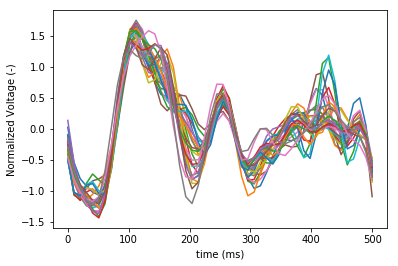

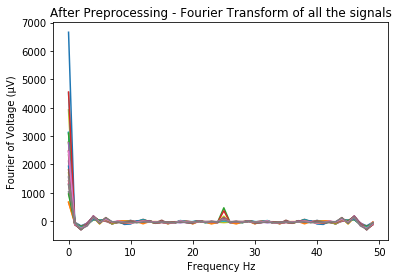

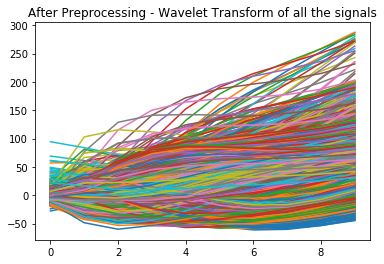

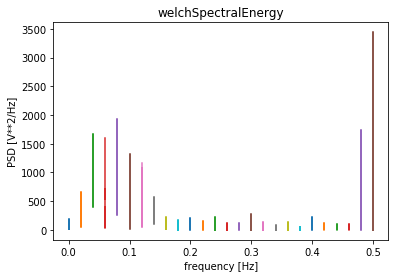

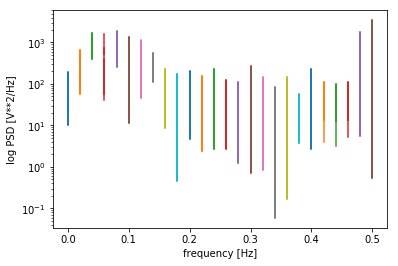

In [23]:
# GET THE RAW DATA AGAIN 
import matplotlib.pyplot as plt
import numpy as np 
from scipy import signal
import scipy
from scipy.signal import find_peaks_cwt

inputlen = np.array(train_input[0, :, 0]) # This signal is labelled 0 !!!!!!! 
time = np.linspace(0, 500, 50)

welchSpectralEnergy = np.zeros((inputlen.size, 26))
f = np.zeros((inputlen.size, 26))
relmaxValue = np.zeros((inputlen.size, 5))
relmaxTime = np.zeros((inputlen.size, 5))

print (inputlen.size)
    
# Actual Preprocessing set 
for i in range (0,inputlen.size):
    data = train_input[0, i, :]
    data = np.array(data)
    
    f[i,:], welchSpectralEnergy[i, :]=signal.welch(data)
    
    fft=scipy.fft(data) #signal denoising 
    bp=fft[:]
    for j in range(len(bp)): 
        if j>=10: #if frequency is higher then 10 Hz 
            bp[j]=0
    ibp=scipy.ifft(bp) 
    
    ibp = signal.detrend(ibp) #signal detrending
    
    #ibp = (ibp-ibp[0])/max(max(ibp), abs(min(ibp))) #signal normalization with initial offset suprresion 
    ibp = (ibp-np.mean(ibp))/np.std(ibp) #signal normalization with initial offset suprresion 
    
    #Find the local maxima of the model (times of the local maxima actually)
    relmax = signal.argrelmax(ibp)
    #print(relmax[0].size)
    if (relmax[0].size == 5): # !!!!! THERE ARE NOT ALWAYS 5 MAXIMA BUT HOW TO SET THE BEST VALUE ???? 
        relmaxTime[i,:] = time[relmax]
        relmaxValue[i,:] = ibp[relmax]
    
    plt.plot(time, ibp)
    plt.xlabel('time (ms)')
    plt.ylabel('Normalized Voltage (-)')
    #plt.title('After Preprocessing - Simple plot of all electrodes')
plt.show()

for i in range (0,inputlen.size) :
    time = np.linspace(0, 500, 50)
    data = train_input[0, i, :]
    data = np.array(data)
    
    fft=scipy.fft(data) #signal denoising 
    plt.plot(fft)
    plt.xlabel('Frequency Hz')
    plt.ylabel('Fourier of Voltage (µV)')
    plt.title('After Preprocessing - Fourier Transform of all the signals')
plt.show()

for i in range (0,inputlen.size) :
    time = np.linspace(0, 500, 50)
    data = train_input[0, i, :]
    data = np.array(data)
    
    wavelet = signal.ricker
    widths = np.arange(1, 11)
    cwtmatr = signal.cwt(data, wavelet, widths)
    plt.plot(cwtmatr)
    plt.title('After Preprocessing - Wavelet Transform of all the signals')
plt.show()

plt.plot(f, welchSpectralEnergy)
plt.title('welchSpectralEnergy')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

plt.semilogy(f, welchSpectralEnergy)
plt.xlabel('frequency [Hz]')
plt.ylabel('log PSD [V**2/Hz]')
plt.show()

### A "1" Labelled signal 

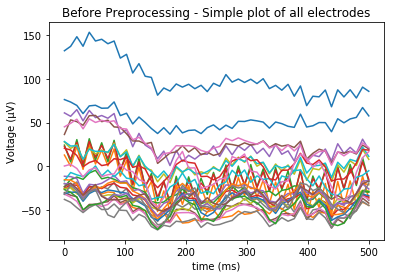

/Users/davidcleres/anaconda/envs/DeepLearning/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


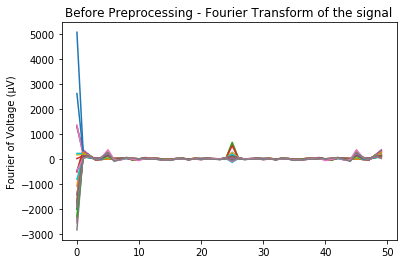

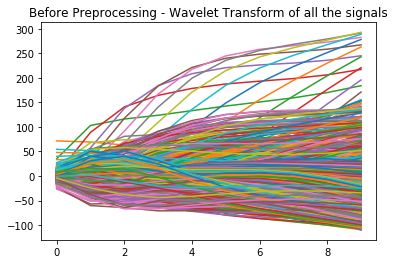

In [11]:
for i in range (0,inputlen.size) :
    time = np.linspace(0, 500, 50)
    data = train_input[1, i, :]
    data = np.array(data)
    plt.plot(time, data)
    plt.xlabel('time (ms)')
    plt.ylabel('Voltage (µV)')
    plt.title('Before Preprocessing - Simple plot of all electrodes') 
plt.show()
    
for i in range (0,inputlen.size) :
    data = train_input[1, i, :]
    data = np.array(data)
    fft=scipy.fft(data) #signal denoising 
    plt.plot(fft)
    plt.ylabel('Fourier of Voltage (µV)')
    plt.title('Before Preprocessing - Fourier Transform of the signal')
plt.show()

for i in range (0,inputlen.size) :
    time = np.linspace(0, 500, 50)
    data = train_input[1, i, :]
    data = np.array(data)
    
    wavelet = signal.ricker
    widths = np.arange(1, 11)
    cwtmatr = signal.cwt(data, wavelet, widths)
    plt.plot(cwtmatr)
    plt.title('Before Preprocessing - Wavelet Transform of all the signals')
plt.show()

28


/Users/davidcleres/anaconda/envs/DeepLearning/lib/python3.6/site-packages/scipy/signal/spectral.py:1785: UserWarning: nperseg = 256 is greater than input length  = 50, using nperseg = 50
  .format(nperseg, input_length))
/Users/davidcleres/anaconda/envs/DeepLearning/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


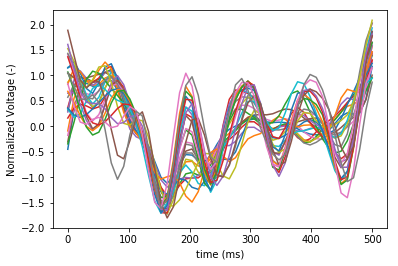

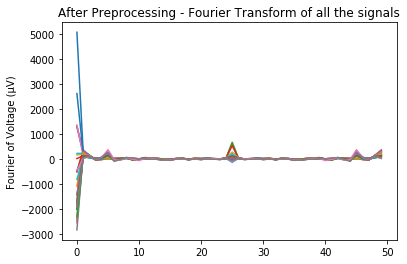

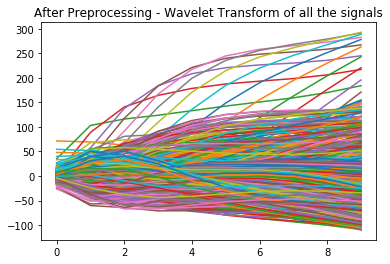

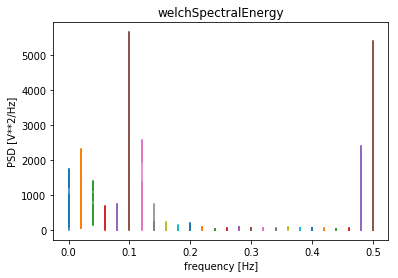

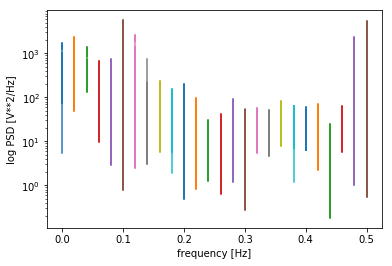

In [24]:
# GET THE RAW DATA AGAIN 
import matplotlib.pyplot as plt
import numpy as np 
from scipy import signal
import scipy

inputlen = np.array(train_input[1, :, 0]) # This signal is labelled 1 !!!!!!! 
print (inputlen.size)

welchSpectralEnergy = np.zeros((inputlen.size, 26))
f = np.zeros((inputlen.size, 26))
    
# Actual Preprocessing set 
for i in range (0,inputlen.size) :
    time = np.linspace(0, 500, 50)
    data = train_input[1, i, :]
    data = np.array(data)
    
    f[i,:], welchSpectralEnergy[i, :]=signal.welch(data)

    fft=scipy.fft(data) #signal denoising 
    bp=fft[:]
    for i in range(len(bp)): 
        if i>=10:
            bp[i]=0
    ibp=scipy.ifft(bp) 

    ibp = signal.detrend(ibp) #signal detrending
    
    #ibp = (ibp-ibp[0])/max(max(ibp), abs(min(ibp))) #signal normalization with initial offset suprresion 
    ibp = (ibp-np.mean(ibp))/np.std(ibp)
    
    plt.plot(time, ibp)
    plt.xlabel('time (ms)')
    plt.ylabel('Normalized Voltage (-)')
    #plt.title('After Preprocessing - Simple plot of all electrodes')  
plt.show()

for i in range (0,inputlen.size) :
    time = np.linspace(0, 500, 50)
    data = train_input[1, i, :]
    data = np.array(data)
    
    fft=scipy.fft(data) #signal denoising 
    plt.plot(fft)
    plt.ylabel('Fourier of Voltage (µV)')
    plt.title('After Preprocessing - Fourier Transform of all the signals')
plt.show()

for i in range (0,inputlen.size) :
    time = np.linspace(0, 500, 50)
    data = train_input[1, i, :]
    data = np.array(data)
    
    wavelet = signal.ricker
    widths = np.arange(1, 11)
    cwtmatr = signal.cwt(data, wavelet, widths)
    plt.plot(cwtmatr)
    plt.title('After Preprocessing - Wavelet Transform of all the signals')
plt.show()

plt.plot(f, welchSpectralEnergy)
plt.title('welchSpectralEnergy')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

plt.semilogy(f, welchSpectralEnergy)
plt.xlabel('frequency [Hz]')
plt.ylabel('log PSD [V**2/Hz]')
plt.show()

## Feature Extraction 

#### A - FFT for each electrode and each of the 316 samples 

In [13]:
'''######## TRAINING DATA SET ########   
numberSamples = (np.array(train_input[:, 0, 0])).size
numberElectrodes = (np.array(train_input[0, :, 0])).size

extractedFeatures = np.zeros((numberSamples, numberElectrodes))

#needs to be computationnally optimized by using the operations shown in the exercises 
for i in range (0, numberSamples): 
    for j in range (0, numberElectrodes): 
        signal = np.array(train_input[i, j, :])
        extractedFeatures[i, j]=scipy.fft(signal)
        
######## TEST DATA SET  ########   
numberSamplesTest = (np.array(test_input[0, :, 0])).size
numberElectrodesTest = (np.array(test_input[0, :, 0])).size

extractedFeatures = np.array(numberSamplesTest, numberElectrodesTest)

for i in range numberSamplesTest: #needs to be computationnally optimized by using the operations shown in the exercises 
    for j in range numberElectrodesTest: 
        signalTest = np.array(test_input[i, j, :])
        extractedFeaturesTest[i, j]=scipy.fft(signalTest)'''

'######## TRAINING DATA SET ########   \nnumberSamples = (np.array(train_input[:, 0, 0])).size\nnumberElectrodes = (np.array(train_input[0, :, 0])).size\n\nextractedFeatures = np.zeros((numberSamples, numberElectrodes))\n\n#needs to be computationnally optimized by using the operations shown in the exercises \nfor i in range (0, numberSamples): \n    for j in range (0, numberElectrodes): \n        signal = np.array(train_input[i, j, :])\n        extractedFeatures[i, j]=scipy.fft(signal)\n        \n######## TEST DATA SET  ########   \nnumberSamplesTest = (np.array(test_input[0, :, 0])).size\nnumberElectrodesTest = (np.array(test_input[0, :, 0])).size\n\nextractedFeatures = np.array(numberSamplesTest, numberElectrodesTest)\n\nfor i in range numberSamplesTest: #needs to be computationnally optimized by using the operations shown in the exercises \n    for j in range numberElectrodesTest: \n        signalTest = np.array(test_input[i, j, :])\n        extractedFeaturesTest[i, j]=scipy.fft(si

#### B - Naive algorithm - taking the mean signal of the electrodes at each time point

In [14]:
######## TRAINING DATA SET ########   
extractedFeatures =  meanSignalFeatures(train_input)
######## TEST DATA SET  ########   
extractedFeaturesTest =  meanSignalFeatures(test_input)

#### C - Naive algorithm - Only keep the signal of maximal amplitude (the best to measure)

In [15]:
######## TRAINING DATA SET ########   
extractedFeatures =  maxSignalFeatures(train_input)
######## TEST DATA SET  ########   
extractedFeaturesTest =  maxSignalFeatures(test_input)

#### D - Sophisticated algorithm - Normalized, detrend, ... - Feature are time and amplitude of local maximas

In [16]:
######## TRAINING DATA SET ########   
extractedFeatures =  normalizedSignalFeatures(train_input, time)
######## TEST DATA SET  ########   
extractedFeaturesTest =  normalizedSignalFeatures(test_input, time)

/Users/davidcleres/anaconda/envs/DeepLearning/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/davidcleres/anaconda/envs/DeepLearning/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[[ 1.02040816e+02  1.63265306e+02  2.55102041e+02 ...  5.09522364e-01
   2.46440165e-01  2.79904723e-01]
 [ 3.06122449e+01  8.16326531e+01  1.93877551e+02 ... -5.31281173e-01
   4.14234132e-01  4.82446365e-02]
 [ 9.18367347e+01  1.63265306e+02  2.75510204e+02 ...  1.02411807e-01
   9.24115717e-01  6.59159005e-01]
 ...
 [ 1.02040816e+01  5.61224490e+01  1.32653061e+02 ... -4.92821038e-01
   9.22708333e-01  5.42346835e-01]
 [ 4.08163265e+01  1.07142857e+02  1.98979592e+02 ... -4.42094326e-01
   3.98334861e-01  1.79641202e-01]
 [ 4.08163265e+01  1.27551020e+02  2.24489796e+02 ...  7.73923576e-01
   6.14756227e-01  8.41111183e-01]]
[[ 7.14285714e+01  1.32653061e+02  2.24489796e+02 ...  1.52218592e+00
   2.39691634e-01  4.13114637e-01]
 [ 1.02040816e+01  1.02040816e+02  1.98979592e+02 ...  1.14385295e+00
   9.78059351e-01  5.20512879e-01]
 [ 3.06122449e+01  1.42857143e+02  2.75510204e+02 ...  4.38850373e-01
   5.57709157e-01  9.19423252e-01]
 ...
 [ 2.04081633e+01  1.22448980e+02  2.3469387

## SVM Regression Model 

In [33]:
from sklearn import svm

clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(extractedFeatures, train_target) #train by fitting the data
test_prediction = clf.predict(extractedFeaturesTest) #prediction

## Accuracy - SVM

In [34]:
counter = 0
for i in range (0, len(test_prediction)):
    if test_prediction[i] == test_target[i]: 
        counter = counter + 1 
        
print('Accuracy = ' + str(counter/len(test_prediction)))

Accuracy = 0.61


## Logistic Regression Model with PCA 

No handles with labels found to put in legend.


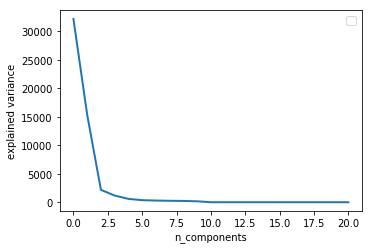

In [38]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

X_train = extractedFeatures
Y_train = np.array(train_target)

# Plot the PCA spectrum
pca.fit(X_train)

plt.figure()
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained variance')

# Prediction
n_components = [5, 10, 15, 20]
Cs = np.logspace(-4, 4, 3)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_train, Y_train)

#plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            #linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

test_prediction = estimator.predict(extractedFeaturesTest) #prediction

## Accuracy - LR + PCA

In [32]:
counter = 0
for i in range (0, len(test_prediction)):
    if test_prediction[i] == test_target[i]: 
        counter = counter + 1 
        
print('Accuracy =' + str(counter/len(test_prediction)))

Accuracy =0.46
